Pregunta 1

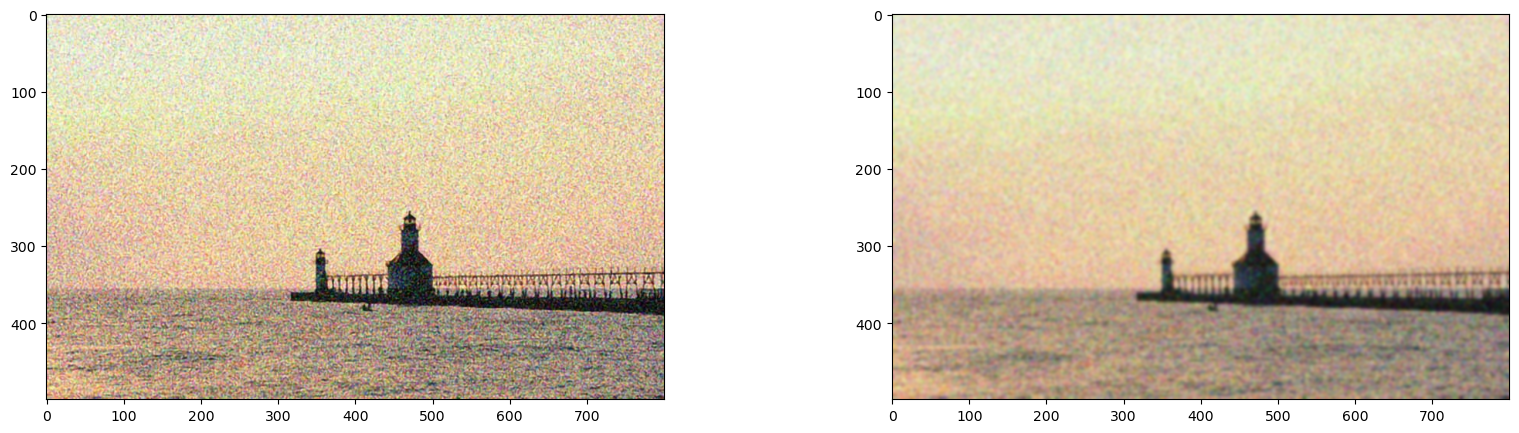

In [188]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image= cv2.imread('./ruido.jpg')
img_blur=cv2.GaussianBlur(image,(11,11),0)


plt.figure(figsize=(20,5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_RGB2BGR))

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_blur,cv2.COLOR_RGB2BGR))


pregunta 2

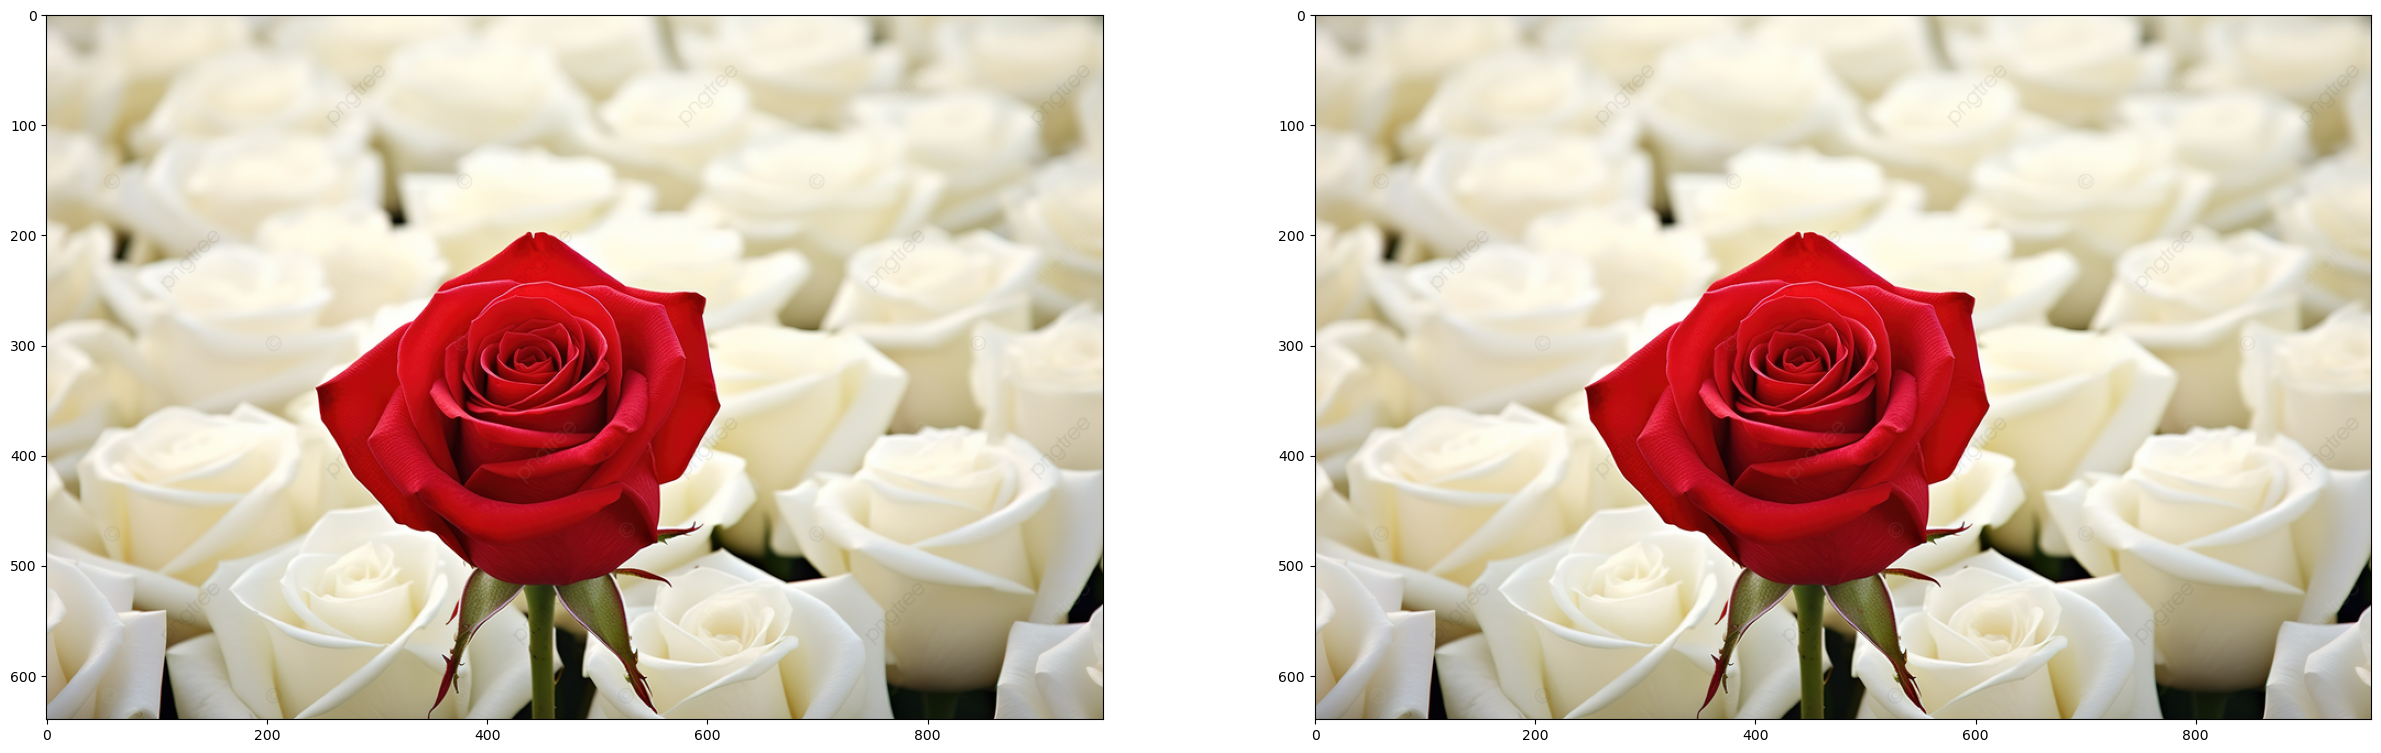

In [54]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk


def contar2(img):
    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    _,binarizada=cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    contorno=sk.measure.label(binarizada,connectivity=1)
    cont=np.max(contorno)
    return cont,binarizada

def desenfoqueROI(img ,img_mask_bin):
  imgCopy = np.copy(img)
  mask =np.zeros_like(img_mask_bin, dtype=np.uint8)
  cv2.bitwise_and(mask,img_mask_bin)
  
  img_mask = cv2.bitwise_and(img,cv2.cvtColor(mask,cv2.COLOR_GRAY2RGB))
  desenfoque = cv2.GaussianBlur(img_mask,(201,201),0)
  imgCopy[mask!=0] = desenfoque[mask!=0]
  return imgCopy

image= cv2.imread('./rosa.png')
cont,bin=contar2(image)
result=desenfoqueROI(cv2.cvtColor(image,cv2.COLOR_RGB2BGR),bin)

plt.figure(figsize=(30,10))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_RGB2BGR))

plt.subplot(122)
plt.imshow(result)


ejercicicio 3


TypeError: imshow() missing 1 required positional argument: 'X'

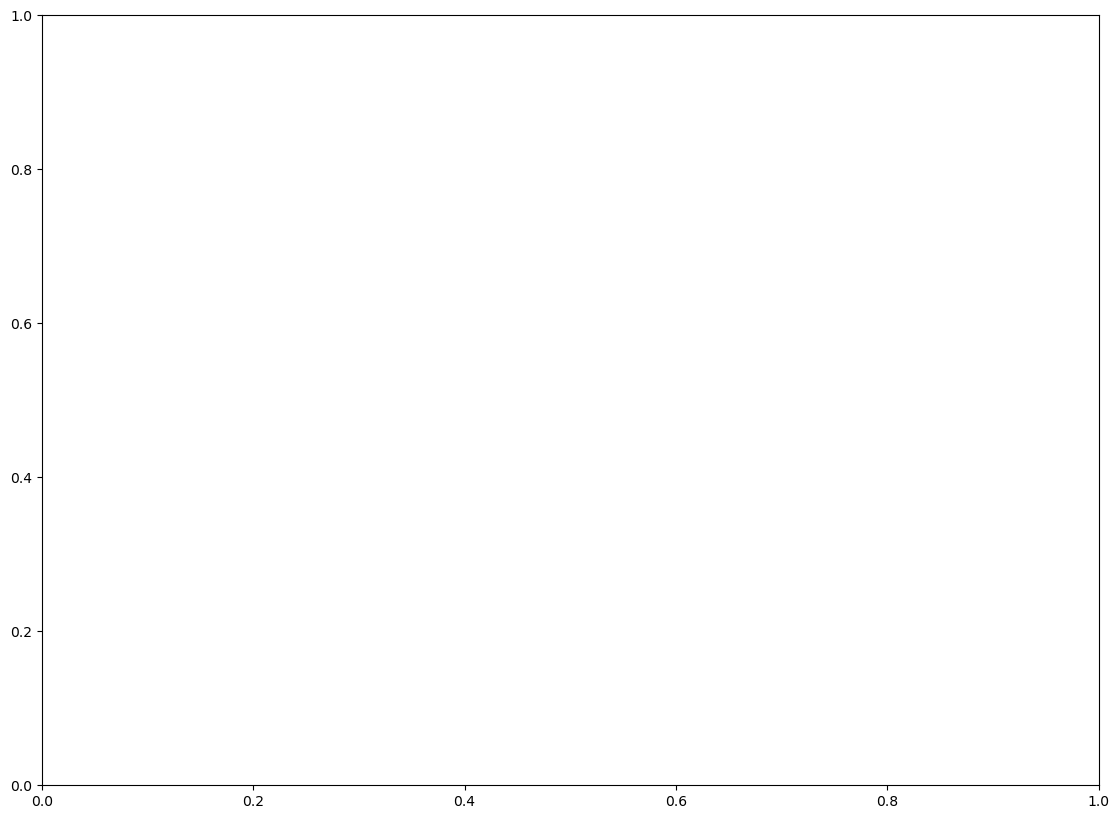

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk



def contar2(img):
    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    _,binarizada=cv2.threshold(img_gray,223,255,cv2.THRESH_BINARY_INV)
    contorno=sk.measure.label(binarizada,connectivity=2)
    cont=np.max(contorno)
    return cont,binarizada


image= cv2.imread('./elementos.jpg')
img_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


r=image[:,:,2]
g=image[:,:,1]
b=image[:,:,0]

y_img=np.zeros_like(img_rgb)
y_img[:,:,2]=r

cont,result =contar2(image)


plt.figure(figsize=(30,10))


plt.subplot(121)
plt.imshow()

plt.subplot(122)
plt.title(f'{cont}')
plt.imshow(result ,cmap='gray')

ejercicio 4

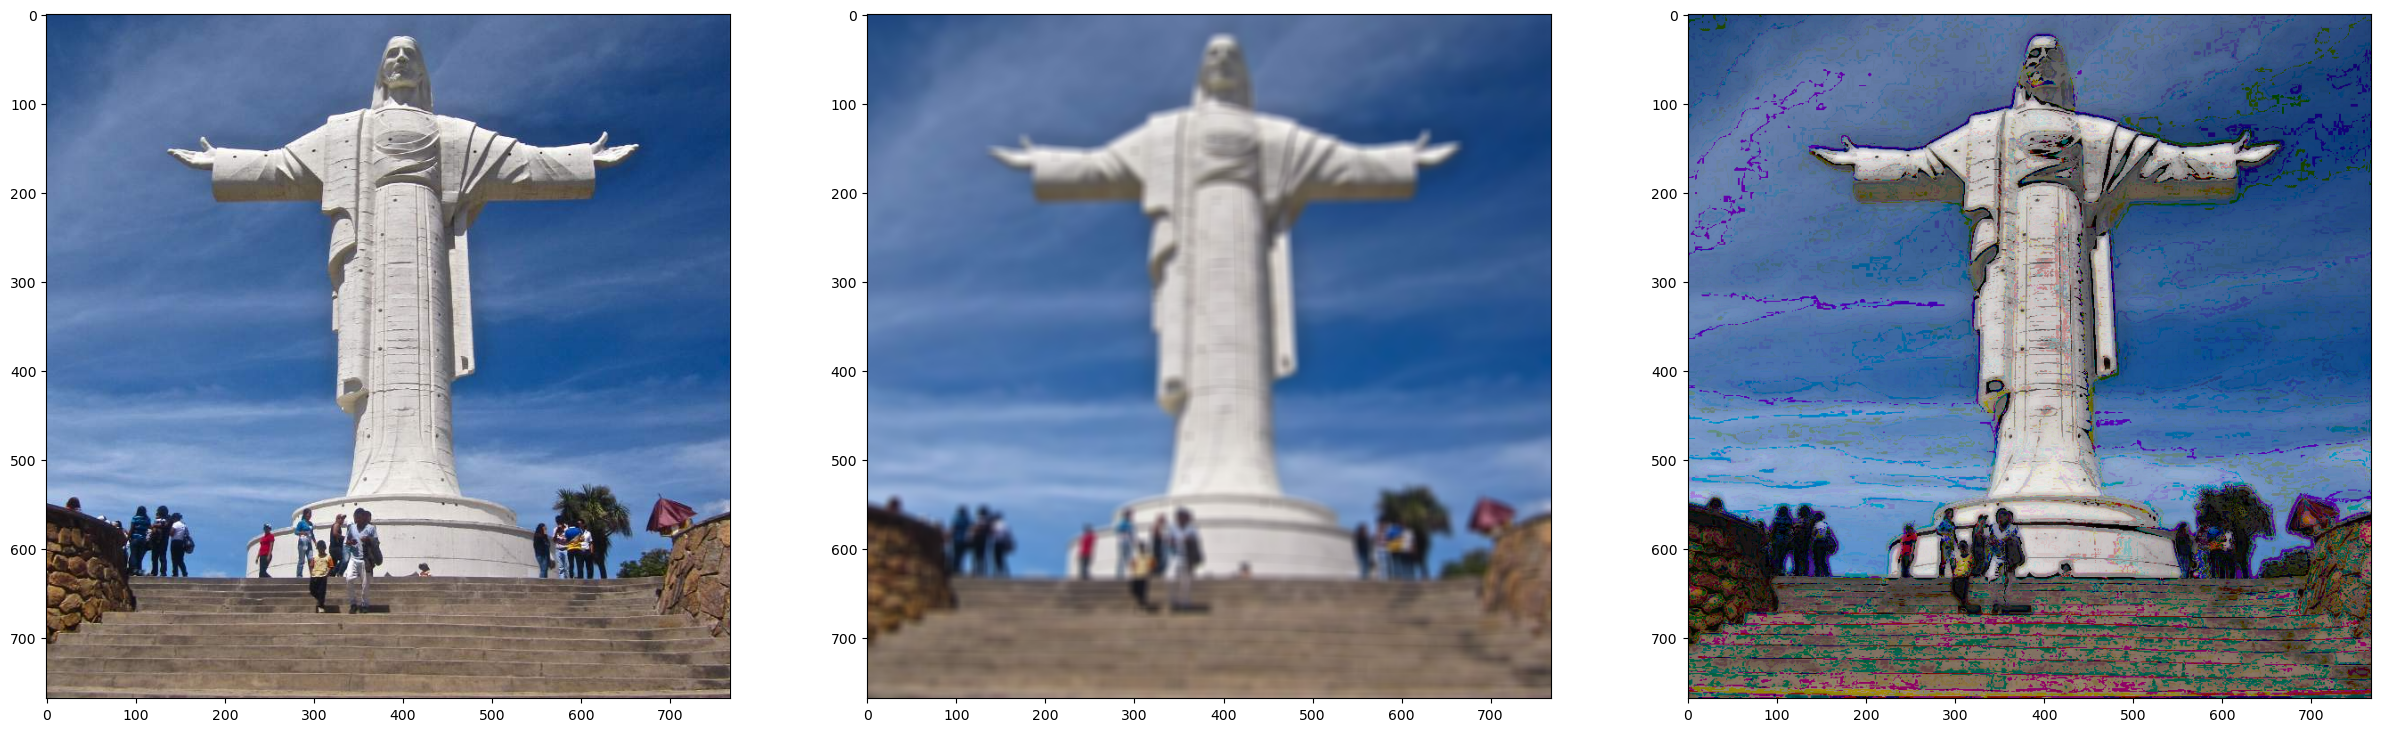

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk

image= cv2.imread('./cristo.jpg')

img_copy=np.copy(image)
img_blur=cv2.GaussianBlur(img_copy,(3,3),0)


kernel7x7=np.ones((11,11),np.float32)/121
suavizado2=cv2.filter2D(img_copy,-1,kernel7x7)
result=cv2.bitwise_and(suavizado2,image)
plt.figure(figsize=(30,10))

plt.subplot(131)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_RGB2BGR))

plt.subplot(132)
plt.imshow(cv2.cvtColor(suavizado2,cv2.COLOR_RGB2BGR))

plt.subplot(133)
plt.imshow(cv2.cvtColor(result,cv2.COLOR_RGB2BGR))


ejercicio 5


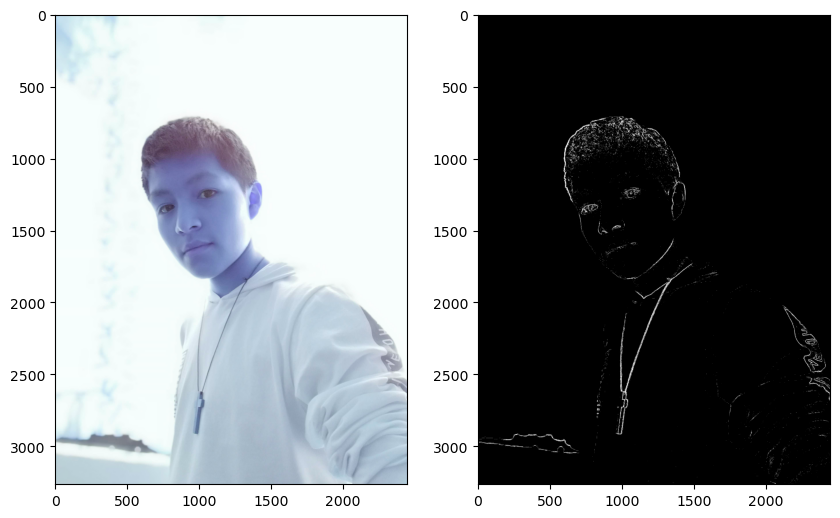

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def robberts_mejorado(imagen):
    imagen_gray=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

    suavizado= cv2.GaussianBlur(imagen_gray,(1,1),0)
    kernelx=np.array([[-2,0],[0,2]],dtype=np.float32)
    kernely=np.array([[0,2],[-2,0]],dtype=np.float32)
    robx=cv2.filter2D(suavizado,cv2.CV_16S,kernelx) #CV_16S trabajar con 16 bits
    roby=cv2.filter2D(suavizado,cv2.CV_16S,kernely) #CV_16S trabajar con 16 bits

    roberts=cv2.addWeighted(np.abs(robx),0.7,np.abs(roby),0.7,0)
    #resaltar las los bordes

    _,borders=cv2.threshold(roberts,20,255,cv2.THRESH_BINARY)
    return borders


img= cv2.imread('./img3.jpg')
img_final=robberts_mejorado(img)

fig,axs = plt.subplots(1,2,figsize=(10,10))

axs[0].imshow(img, cmap="gray")
axs[1].imshow(img_final , cmap='gray')


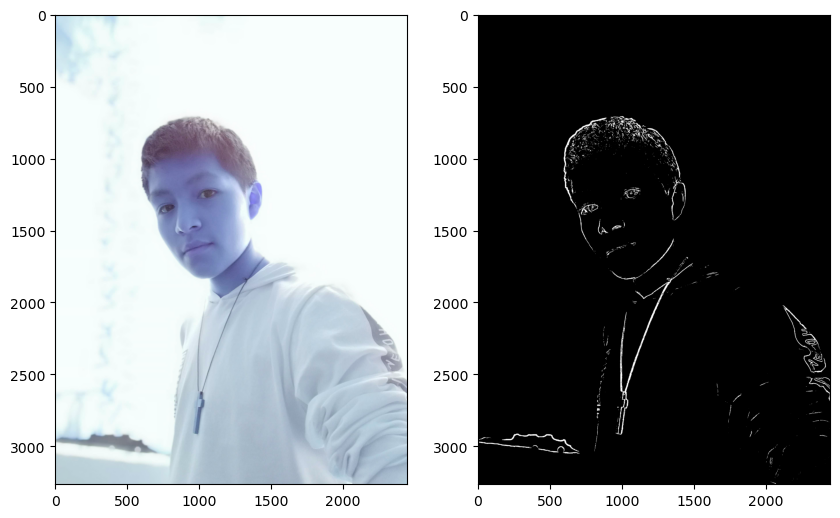

In [95]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def sobel_mejoardo(imagen,tam_kernel=3,umbral=30):
    img_gray=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
    img_gray=cv2.GaussianBlur(img_gray,(3,3),0)

    sobelx=cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=tam_kernel)
    sobely=cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=tam_kernel)

    magnitud=np.sqrt(sobelx**2 + sobely**2)

    magnitud=cv2.normalize(magnitud,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U)
    _,border=cv2.threshold(magnitud,umbral,255,cv2.THRESH_BINARY) #agrageamos OTSU

    kernel_morf=np.ones((2,2),np.uint8)
    border=cv2.morphologyEx(border,cv2.MORPH_CLOSE,kernel_morf)
    return border

img= cv2.imread('./img3.jpg')
img_final=sobel_mejoardo(img)

fig,axs = plt.subplots(1,2,figsize=(10,10))

axs[0].imshow(img, cmap="gray")
axs[1].imshow(img_final , cmap='gray')


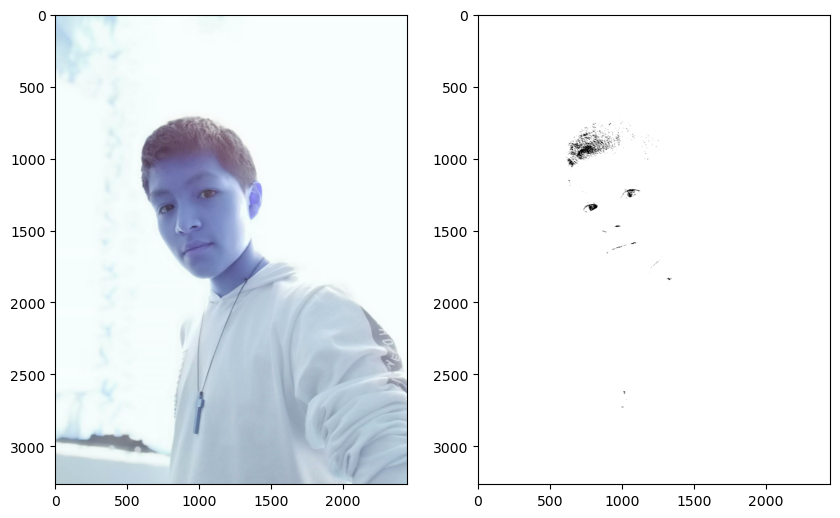

In [104]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def prewit_mejorado(imagen):
    img_gray=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
    img_gray=cv2.GaussianBlur(img_gray,(3,3),0)

    prewittx=np.array([[3,0,-3],[3,0,-3],[3,0,-3]],dtype=np.float32)
    prewitty=np.array([[3,0,3],[0,0,0],[-3,-3,-3]],dtype=np.float32)

    x=cv2.filter2D(img_gray,cv2.CV_64F,prewittx)
    y=cv2.filter2D(img_gray,cv2.CV_64F,prewitty)

    margitud= np.sqrt(x**2+y**2)
    _,border=cv2.threshold(margitud,250,255,cv2.THRESH_BINARY)
    return border

img= cv2.imread('./img3.jpg')
img_final=prewit_mejorado(img)

fig,axs = plt.subplots(1,2,figsize=(10,10))

axs[0].imshow(img, cmap="gray")
axs[1].imshow(img_final , cmap='gray')



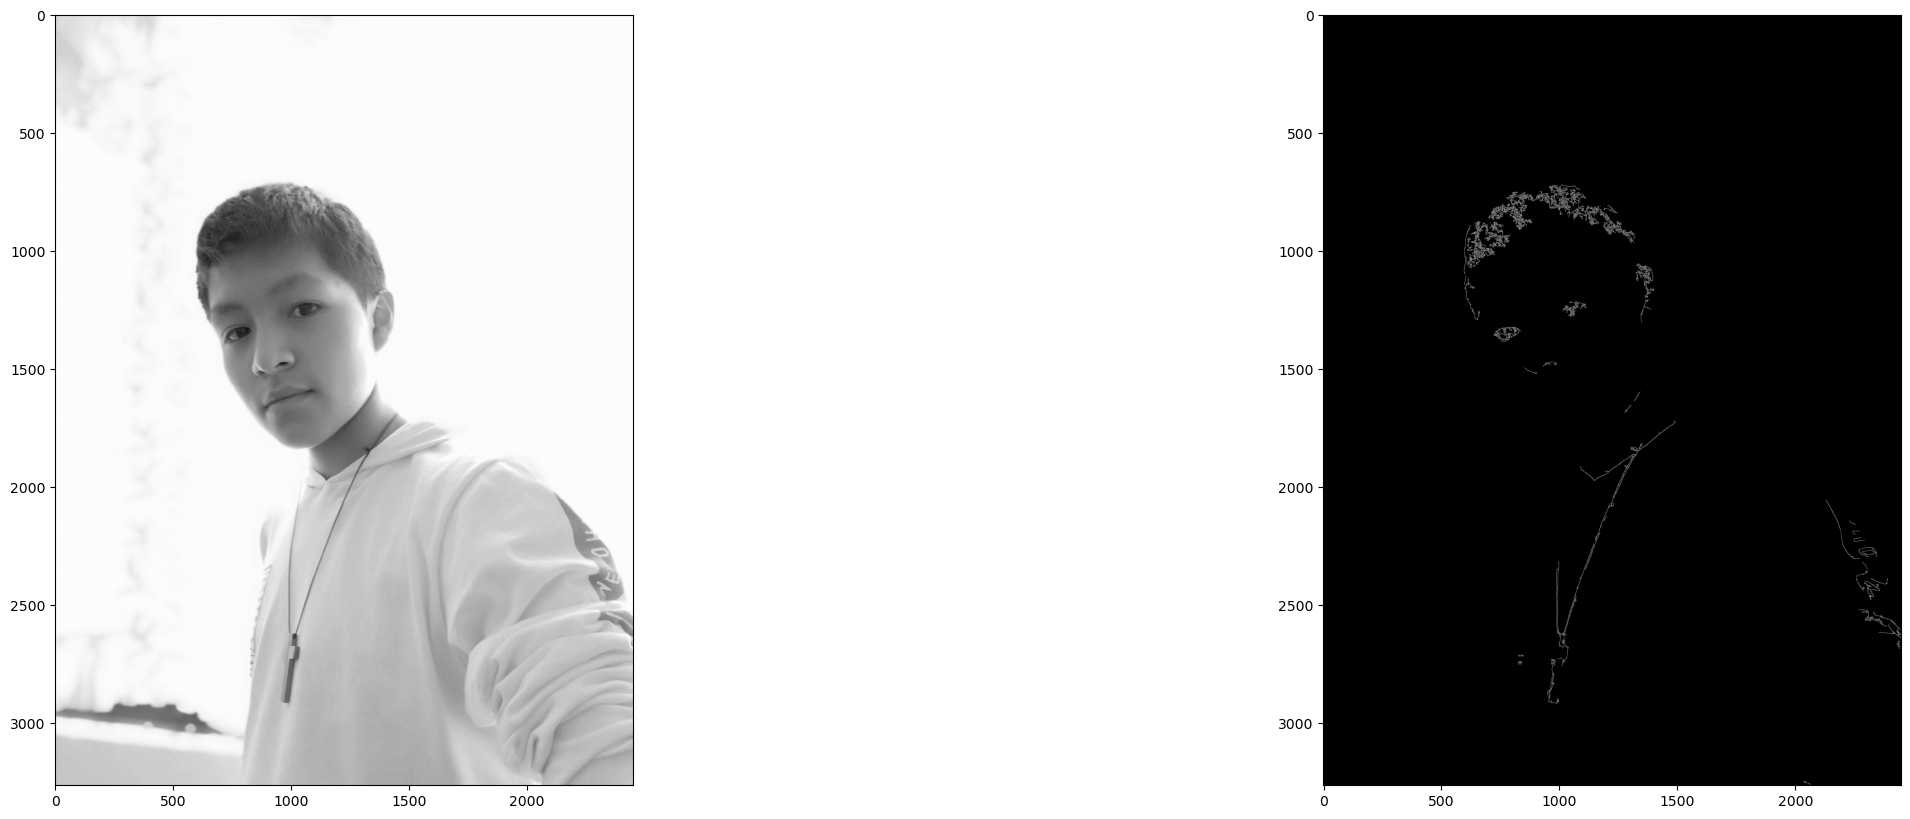

In [143]:

import cv2 
import numpy as np
import matplotlib.pyplot as plt

imagen=cv2.imread('./img3.jpg')
img_gray=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(img_gray, 2,200)


plt.figure(figsize=(30,10))

plt.subplot(121)
plt.imshow(img_gray,cmap='gray')

plt.subplot(122)
plt.imshow(canny,cmap='gray')

Tanto el Roberts como el Sobel tienen una gran deteccion de bordes ambos detectan muy de manera buena rasgos facieles y elementos pero se ve una mejor deteccion de los border del filtro sobel eso incluye mejor deteccion de border faciales y objetos ,posteriormemte vemos que el filtro detecta bordes oscureciendo la imagen y los borders claros que en esta ocacion pierda deteccion de los border pero aun asi podemos observar los rasgos faciales y finalmente el canny tiene una deteccion muy lijera 

Ejercicio 6

<function matplotlib.pyplot.show(close=None, block=None)>

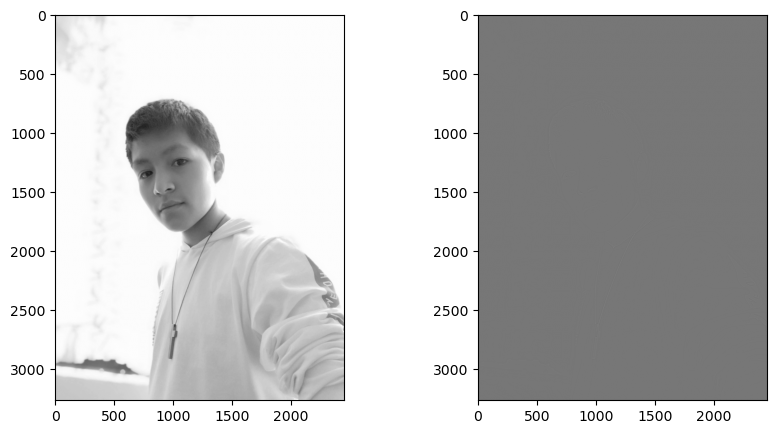

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



img= cv2.imread('./img3.jpg',cv2.IMREAD_GRAYSCALE)
laplacian = cv2.Laplacian(img, cv2.CV_64F)


plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img,cmap='gray')

plt.subplot(122)
plt.imshow(laplacian,cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

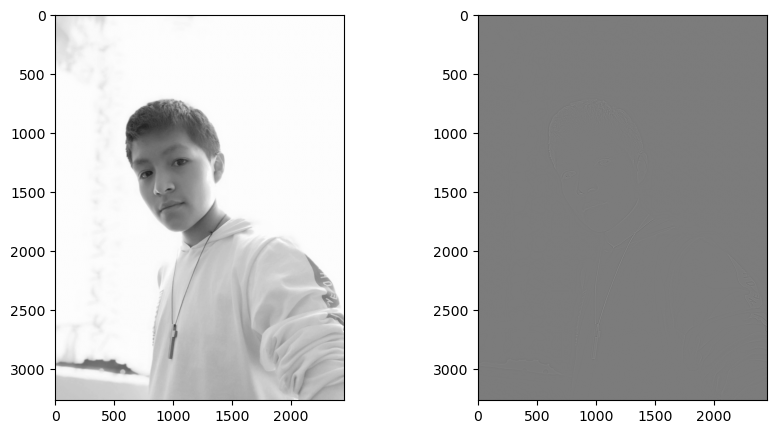

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



img= cv2.imread('./img3.jpg',cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(img, (3, 3), 0)

laplacian = cv2.Laplacian(blur, cv2.CV_64F)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img,cmap='gray')

plt.subplot(122)
plt.imshow(laplacian,cmap='gray')
plt.show